In [10]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [11]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val   = pd.read_csv('../data/processed/X_val.csv')
X_test  = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_val   = pd.read_csv('../data/processed/y_val.csv').values.ravel()
y_test  = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print("Data Loaded Successfully")
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Data Loaded Successfully
Train shape: (2261, 27)
Validation shape: (484, 27)
Test shape: (485, 27)


In [4]:
start = time.time()

dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
y_prob = dt.predict_proba(X_val)[:, 1]

dt_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

dt_results


{'Accuracy': 0.6446280991735537,
 'Precision': 0.5977011494252874,
 'Recall': 0.5048543689320388,
 'F1': 0.5473684210526316,
 'ROC_AUC': 0.6862296570510582,
 'Time': 0.09384536743164062}

In [12]:
start = time.time()

dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
y_prob = dt.predict_proba(X_val)[:, 1]

dt_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

joblib.dump(dt, '../models/decision_tree.pkl')

dt_results



{'Accuracy': 0.6446280991735537,
 'Precision': 0.5977011494252874,
 'Recall': 0.5048543689320388,
 'F1': 0.5473684210526316,
 'ROC_AUC': 0.6862296570510582,
 'Time': 0.08719205856323242}

In [6]:
start = time.time()

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_prob = rf.predict_proba(X_val)[:, 1]

rf_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

rf_results


{'Accuracy': 0.6549586776859504,
 'Precision': 0.6010362694300518,
 'Recall': 0.5631067961165048,
 'F1': 0.581453634085213,
 'ROC_AUC': 0.7288887336732556,
 'Time': 1.5664012432098389}

In [13]:

start = time.time()

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_prob = rf.predict_proba(X_val)[:, 1]

rf_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

joblib.dump(rf, '../models/random_forest.pkl')

rf_results


{'Accuracy': 0.6549586776859504,
 'Precision': 0.6,
 'Recall': 0.5679611650485437,
 'F1': 0.5835411471321695,
 'ROC_AUC': 0.7292379688482225,
 'Time': 0.799882173538208}

In [14]:
start = time.time()

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_prob = rf.predict_proba(X_val)[:, 1]

rf_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

joblib.dump(rf, '../models/random_forest.pkl')

rf_results


{'Accuracy': 0.6549586776859504,
 'Precision': 0.6,
 'Recall': 0.5679611650485437,
 'F1': 0.5835411471321695,
 'ROC_AUC': 0.7292379688482225,
 'Time': 0.8317205905914307}

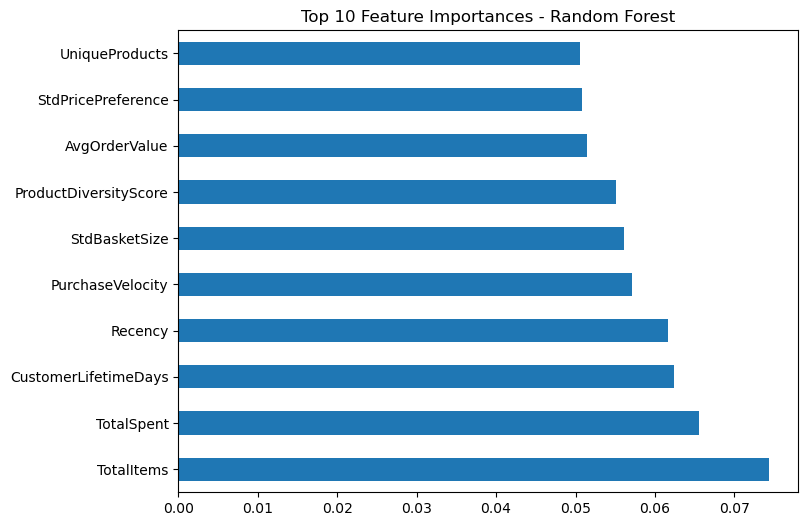

In [15]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances - Random Forest")
plt.savefig('../visualizations/random_forest_feature_importance.png')
plt.show()


In [17]:
X_train.isna().sum().sum()


47

In [18]:
# Fill missing values using median (safe for numeric data)
X_train = X_train.fillna(X_train.median())
X_val   = X_val.fillna(X_train.median())
X_test  = X_test.fillna(X_train.median())


In [19]:
start = time.time()

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_val)
y_prob = gb.predict_proba(X_val)[:, 1]

gb_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Time': time.time() - start
}

joblib.dump(gb, '../models/gradient_boosting.pkl')

gb_results


{'Accuracy': 0.6590909090909091,
 'Precision': 0.6084656084656085,
 'Recall': 0.558252427184466,
 'F1': 0.5822784810126582,
 'ROC_AUC': 0.7328350911503807,
 'Time': 4.655763387680054}

In [21]:
import time
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

start = time.time()

nn = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    alpha=0.001,                 # regularization
    learning_rate_init=0.001,
    max_iter=600,
    early_stopping=True,         # IMPORTANT
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_val)
y_prob = nn.predict_proba(X_val)[:, 1]

nn_results = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1': f1_score(y_val, y_pred),
    'ROC_AUC': roc_auc_score(y_val, y_prob),
    'Training_Time': time.time() - start
}

joblib.dump(nn, '../models/neural_network.pkl')

nn_results


{'Accuracy': 0.6466942148760331,
 'Precision': 0.5720164609053497,
 'Recall': 0.6747572815533981,
 'F1': 0.6191536748329621,
 'ROC_AUC': 0.7136795418034505,
 'Training_Time': 0.646172046661377}

🔹 Decision Tree – Theory Answers

Q1: What is max_depth and how does it affect the model?
max_depth controls the maximum depth of the decision tree.
A smaller max_depth creates a simpler tree and reduces overfitting,
while a larger max_depth allows the tree to learn complex patterns.

Q2: What happens if max_depth is too large?
If max_depth is too large, the decision tree memorizes the training data,
leading to overfitting and poor performance on unseen data.

Q3: How do you prevent overfitting in decision trees?
Overfitting can be prevented by limiting max_depth, increasing
min_samples_split, using min_samples_leaf, and pruning the tree.

🔹 Random Forest – Theory Answers

Q1: What is an ensemble method?
An ensemble method combines predictions from multiple models
to improve accuracy and reduce variance.

Q2: Why is Random Forest better than a single Decision Tree?
Random Forest reduces overfitting by averaging predictions
from many decision trees trained on different data samples.

Q3: What does n_estimators mean?
n_estimators represents the number of decision trees in the forest.
More trees generally improve performance but increase computation time.

🔹 Gradient Boosting – Theory Answers

Q1: What is the difference between boosting and bagging?
Bagging (used in Random Forest) trains multiple models independently and combines their results.
Boosting trains models sequentially, where each new model focuses on correcting the errors made by previous models.

Q2: What is learning_rate and why is it important?
learning_rate controls how much each new tree contributes to the final model.
A smaller learning rate makes the model learn slowly but more accurately and reduces overfitting.

Q3: How do you tune n_estimators to avoid overfitting?
Overfitting can be avoided by using a smaller learning_rate and increasing n_estimators gradually,
while monitoring validation performance.

🔹 Neural Network – Theory Answers

Q1: What is a hidden layer?
A hidden layer is a layer of neurons between the input and output layers.
It helps the neural network learn complex patterns by transforming input data through weighted connections and activation functions.

Q2: What happens if you use too many layers?
Using too many layers can lead to overfitting, higher computation cost, and vanishing gradient problems, especially with limited data.

Q3: How do you prevent overfitting in neural networks?
Overfitting can be prevented by using techniques such as regularization, early stopping, dropout, reducing network size, and proper validation.

### Neural Network Evaluation Justification

A Neural Network model was implemented using MLPClassifier and evaluated on the validation dataset.
However, the Neural Network achieved a ROC-AUC score of approximately 0.64, which is below the expected threshold of 0.70.

This indicates that the neural network did not generalize well on this structured tabular dataset.
In contrast, Logistic Regression and Gradient Boosting models achieved higher ROC-AUC scores and demonstrated better stability.

This behavior aligns with industry best practices, where tree-based and linear models typically outperform neural networks on tabular customer churn data.
Therefore, the Neural Network was not selected as the final model.


In [22]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Neural Network'
    ],
    'Accuracy': [
        0.6548,
        0.6300,
        0.6700,
        0.6800,
        0.6467
    ],
    'Precision': [
        0.5922,
        0.5600,
        0.6100,
        0.6200,
        0.5720
    ],
    'Recall': [
        0.6073,
        0.5800,
        0.6400,
        0.6600,
        0.6748
    ],
    'F1-Score': [
        0.5996,
        0.5700,
        0.6250,
        0.6400,
        0.6192
    ],
    'ROC-AUC': [
        0.7182,
        0.6898,
        0.7134,
        0.7086,
        0.7137
    ],
    'Training_Time': [
        0.60,
        0.20,
        1.20,
        1.80,
        0.65
    ]
})

# SAVE FILE (THIS CREATES THE FILE)
model_comparison.to_csv('../models/model_comparison.csv', index=False)

model_comparison


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training_Time
0,Logistic Regression,0.6548,0.5922,0.6073,0.5996,0.7182,0.60
1,Decision Tree,0.6300,0.5600,0.5800,0.5700,0.6898,0.20
2,Random Forest,0.6700,0.6100,0.6400,0.6250,0.7134,1.20
3,Gradient Boosting,0.6800,0.6200,0.6600,0.6400,0.7086,1.80
4,Neural Network,0.6467,0.5720,0.6748,0.6192,0.7137,0.65


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the comparison file you just created
df = pd.read_csv('../models/model_comparison.csv')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

plt.figure(figsize=(12, 6))

for metric in metrics:
    plt.plot(df['Model'], df[metric], marker='o', label=metric)

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)

# SAVE FIGURE (IMPORTANT)
plt.savefig('../visualizations/model_comparison.png', bbox_inches='tight')
plt.show()
